In [2]:
# ============================================================
# Student Placement Prediction using ML Techniques
# ============================================================

# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Load Dataset
df = pd.read_csv("student_placement_data.csv")   # 👈 Upload your CSV file in Colab first
print("✅ Dataset Loaded Successfully!\n")
print(df.head())

#Drop Irrelevant Columns
df = df.drop(columns=["name"])

✅ Dataset Loaded Successfully!

        name  age  gender      branch  attendance_percentage  current_cgpa  \
0  Student_1   22    Male          HR                   70.7          6.05   
1  Student_2   20    Male          HR                   85.9          6.41   
2  Student_3   22    Male  Management                   67.6          9.80   
3  Student_4   21  Female       Other                   89.1          9.70   
4  Student_5   22    Male         CSE                   75.6          9.11   

   graduation_percentage   hsc   ssc  aptitude_score  communication_skills  \
0                   79.1  92.3  76.0              44                     4   
1                   70.7  66.9  67.6              32                     9   
2                   94.2  78.6  73.8              36                     4   
3                   80.7  79.5  91.9              37                     6   
4                   91.4  66.5  89.8              30                     7   

   technical_skills domain int

In [3]:
# 4️⃣ Encode Categorical Columns
cat_cols = ["gender", "branch", "domain", "internship", "certifications", "placement_status"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 5️⃣ Define Features and Target
X = df.drop(columns=["placement_status"])
y = df["placement_status"]

In [4]:
# 6️⃣ Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7️⃣ Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8️⃣ Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [5]:
# 9️⃣ Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n📊 {name}")
    print("Accuracy:", round(acc*100, 2), "%")
    print(classification_report(y_test, y_pred))


📊 Logistic Regression
Accuracy: 92.73 %
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        43

    accuracy                           0.93        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.93      0.93      0.93        55


📊 Decision Tree
Accuracy: 81.82 %
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.92      0.84      0.88        43

    accuracy                           0.82        55
   macro avg       0.74      0.79      0.76        55
weighted avg       0.84      0.82      0.83        55


📊 Random Forest
Accuracy: 89.09 %
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.91      0.95      0.93        43

    accuracy                           0.89        55
   macro avg     

In [6]:
# 🔟 Compare Model Accuracies
print("\n✅ Model Comparison:")
for name, acc in results.items():
    print(f"{name}: {round(acc*100, 2)}%")

# 🎯 Identify Best Model
best_model = max(results, key=results.get)
print(f"\n🏆 Best Performing Model: {best_model} ({round(results[best_model]*100, 2)}%)")


✅ Model Comparison:
Logistic Regression: 92.73%
Decision Tree: 81.82%
Random Forest: 89.09%
SVM: 89.09%
KNN: 83.64%
Naive Bayes: 87.27%

🏆 Best Performing Model: Logistic Regression (92.73%)


In [7]:
# ============================================================
# 📊 Visualization & Feature Analysis
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

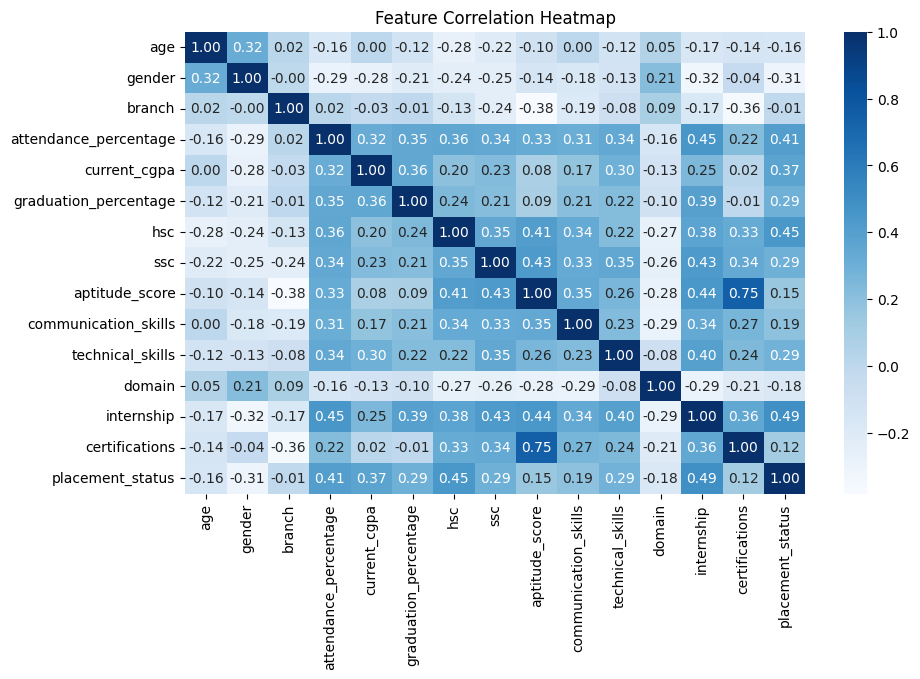

In [8]:
# 1️⃣ Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

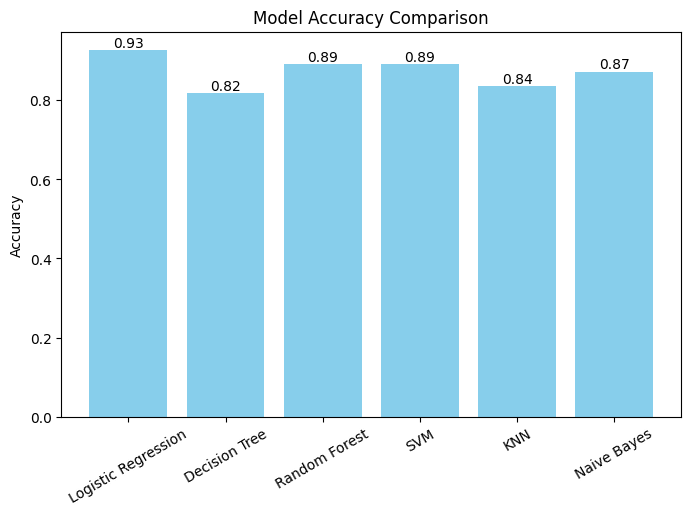

In [9]:
# 2️⃣ Accuracy Comparison Bar Chart
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xticks(rotation=30)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(results.values()):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()

C:\Users\cheta\AppData\Local\Temp\ipykernel_17592\1908955034.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


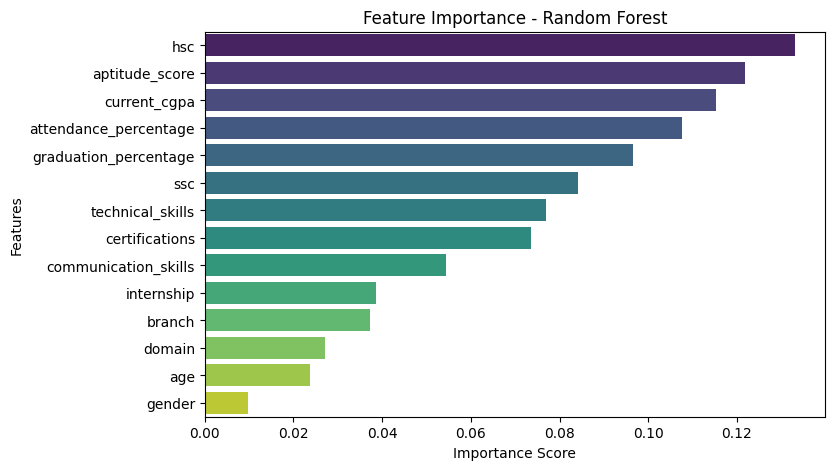

In [10]:
# 3️⃣ Feature Importance (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=["placement_status"]).columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

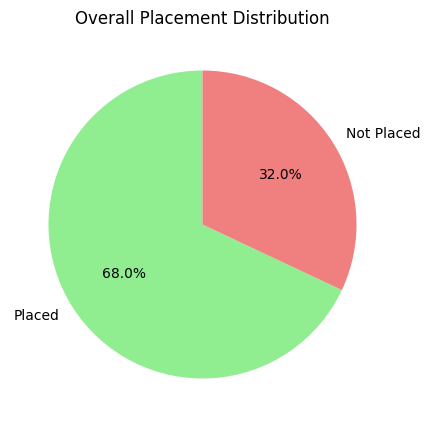

In [11]:
# 4️⃣ Pie Chart of Placement Status Distribution
plt.figure(figsize=(5,5))
df["placement_status"].replace({1: "Placed", 0: "Not Placed"}).value_counts().plot.pie(
    autopct="%1.1f%%", colors=["lightgreen", "lightcoral"], startangle=90
)
plt.title("Overall Placement Distribution")
plt.ylabel("")
plt.show()
